## Vizualising CV results

[![colab badge](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mcallaghan/NLP-climate-science-tutorial-CCAI/blob/main/E_viz_cv_experiments.ipynb)

Now that we have run our CV experiments, it's time to have a look at the results. We'll do this with a simple boxplot showing the spread of each performance metric across our validation folds. Given that we have very few data points, it makes sense to make this clear by plotting the points as well.

Mounted at /content/drive
[0.97207838 0.98543751 1.03035344 0.99582561 0.98549191]
[2.00602542 1.97957241 1.98755013 2.06107481 2.08442035]
[2.9753168  2.93834736 2.92419156 3.09093588 2.97211748]


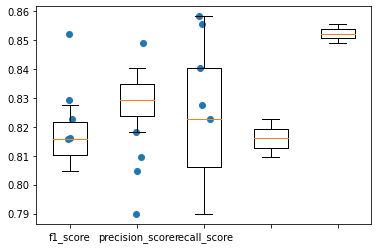

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
## If we are running in colab, mount google drive and change into the directory we cloned the repository into
if os.path.exists("/content/"):
    from google.colab import drive
    import os
    drive.mount('/content/drive')
    os.chdir("/content/drive/MyDrive/NLP-climate-science-tutorial-CCAI") 

results = pd.read_json("cv_data/INCLUDE/outer_results_5_splits.json")

fig, ax = plt.subplots()

for i, metric in enumerate(results.columns):
    jitter = np.random.random(size=results.shape[0])*0.2 + i+0.9
    print(jitter)
    ax.scatter(jitter, results[metric], color="C0")
    
ax.boxplot(results, showfliers=False)
ax.set_xticklabels(results.columns)
plt.show()


In [2]:
results

,f1_score,precision_score,recall_score
0,0.815972,0.804795,0.827465
1,0.829175,0.818182,0.840467
2,0.822642,0.789855,0.858268
3,0.816000,0.809524,0.822581
4,0.852273,0.849057,0.855513


### Multilabel results

For the multilabel class, results are more complex - but we can compute the same metrics for each class, and then show different aggregations of these across classes. The macro average takes the unweighted mean of the metric for each label, the micro average calculates metrics globally by counting all true/false positives/negatives across classes.

[Text(0, 0, 'Micro average'),
 Text(0, 0, 'Macro average'),
 Text(0, 0, 'Coastal and marine Ecosystems'),
 Text(0, 0, 'Human and managed systems'),
 Text(0, 0, 'Mountains, snow and ice'),
 Text(0, 0, 'Rivers, lakes, and soil moisture'),
 Text(0, 0, 'Terrestrial ES')]

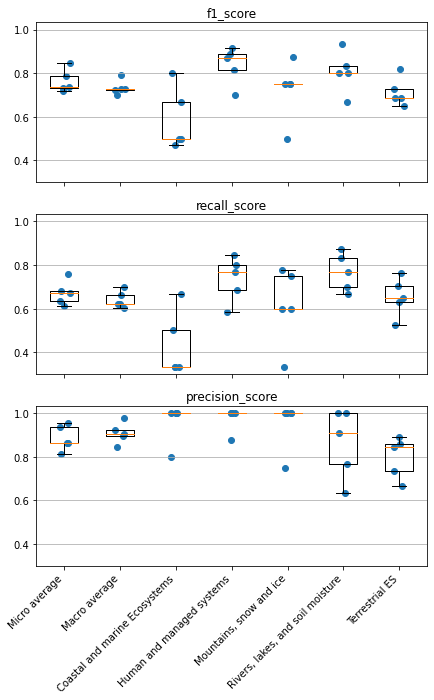

In [3]:

results = pd.read_json("cv_data/12/outer_results_5_splits.json")
impact_labels = [
    "Coastal and marine Ecosystems",
    "Human and managed systems",
    "Mountains, snow and ice",
    "Rivers, lakes, and soil moisture",
    "Terrestrial ES"
]
impact_indices = [x for x in range(len(impact_labels))]

fig, axs = plt.subplots(3, figsize=(7,10), sharex=True, sharey=True)

metrics = ["f1_score", "recall_score", "precision_score"]
for i, metric in enumerate(metrics):
    ax = axs[i]
    ax.set_title(metric)
    metric_labels = [f"{metric}_{x}" for x in ["micro", "macro"] + impact_indices]
    for j, col in enumerate(metric_labels):
        jitter = np.random.random(size=results.shape[0])*0.2 + j+0.9
        ax.scatter(jitter, results[col], color="C0")    
        
    ax.boxplot([results[col] for col in metric_labels], showfliers=False)
    ax.grid(axis="y")
    
impact_labels = ["Micro average", "Macro average"] + impact_labels
ax.set_xticks(range(1,len(impact_labels)+1))
ax.set_xticklabels(impact_labels, rotation=45, ha="right")